In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_BASE = r'https://github.com/alishakiba/DataMiningCourse/raw/master/'
DOWNLOAD_URL = DOWNLOAD_BASE + 'housing.tgz'
DATASET_PATH = os.path.join(".", "housing") #'.' + 'housing'
print(DOWNLOAD_BASE)
print(DOWNLOAD_URL)
print(DATASET_PATH)

https://github.com/alishakiba/DataMiningCourse/raw/master/
https://github.com/alishakiba/DataMiningCourse/raw/master/housing.tgz
.\housing


In [3]:
def fetch_housing_data(url=DOWNLOAD_URL, path=DATASET_PATH):
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join('.', 'housing.tgz')
    urllib.request.urlretrieve(url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

In [6]:
def load_housing_data(path=DATASET_PATH):
    csv_path = os.path.join(path, 'housing.csv')
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

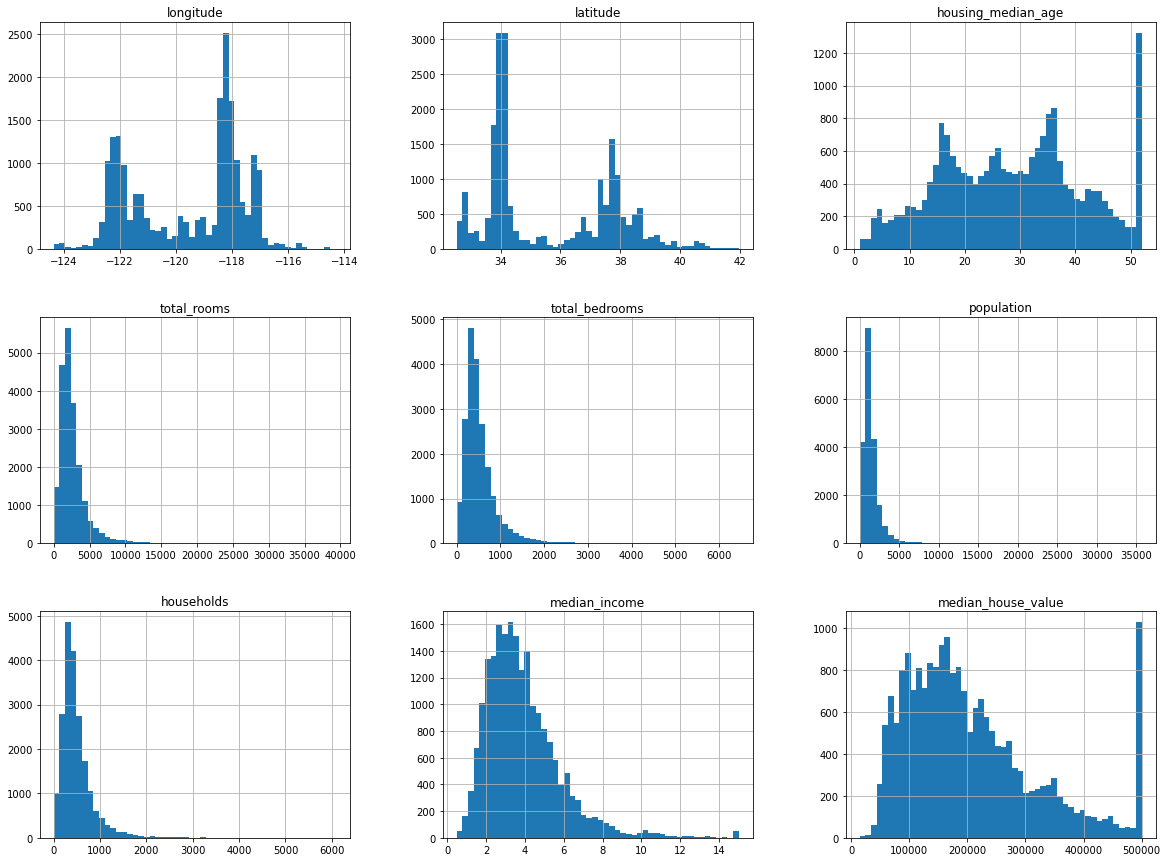

In [13]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
import numpy as np

In [15]:
np.random.seed(1234)

In [16]:
def split_train_test(data, test_ratio):
    permuted_indices = np.random.permutation(len(data))
    test_length = int(len(data) * test_ratio)
    test_indices = permuted_indices[:test_length]
    train_indices = permuted_indices[test_length:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [17]:
train_data, test_data = split_train_test(housing, 0.2)

In [18]:
len(train_data)

16512

In [19]:
len(test_data)

4128

In [20]:
housing['income_median_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                     labels=[0,1,2,3,4])

<AxesSubplot:>

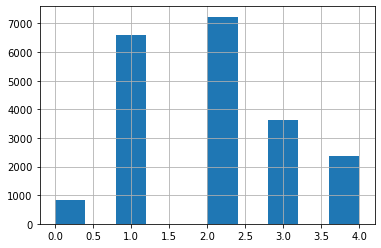

In [21]:
housing['income_median_cat'].hist()

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1234)
for train_index, test_index in split.split(housing, housing['income_median_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
strat_test_set['income_median_cat'].value_counts() / len(strat_test_set)

2    0.350533
1    0.318798
3    0.176357
4    0.114583
0    0.039729
Name: income_median_cat, dtype: float64

In [25]:
strat_train_set['income_median_cat'].value_counts() / len(strat_train_set)

2    0.350594
1    0.318859
3    0.176296
4    0.114402
0    0.039850
Name: income_median_cat, dtype: float64

In [26]:
housing['income_median_cat'].value_counts() / len(housing)

2    0.350581
1    0.318847
3    0.176308
4    0.114438
0    0.039826
Name: income_median_cat, dtype: float64

In [27]:
strat_train_set.drop('income_median_cat', axis=1, inplace=True)
strat_test_set.drop('income_median_cat', axis=1, inplace=True)

In [28]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11587,-118.02,33.78,28.0,3375.0,559.0,1754.0,554.0,5.5446,228900.0,<1H OCEAN
12635,-121.47,38.48,25.0,2969.0,551.0,1745.0,487.0,2.6382,76200.0,INLAND
8021,-118.11,33.84,36.0,1756.0,297.0,798.0,287.0,5.5581,218300.0,<1H OCEAN
19326,-122.94,38.50,46.0,2280.0,492.0,807.0,366.0,2.6316,117000.0,<1H OCEAN
9052,-118.12,34.71,46.0,40.0,10.0,14.0,7.0,1.1250,225000.0,INLAND


In [29]:
housing_data = strat_train_set.copy()

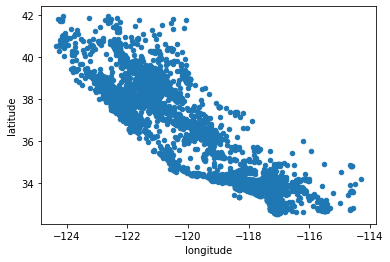

In [31]:
housing_data.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

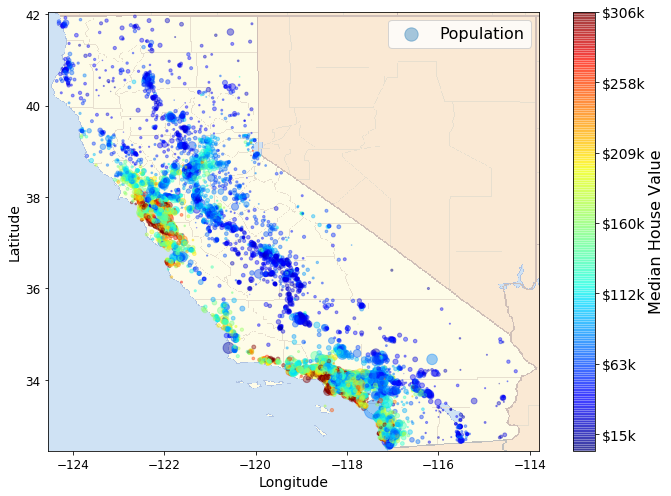

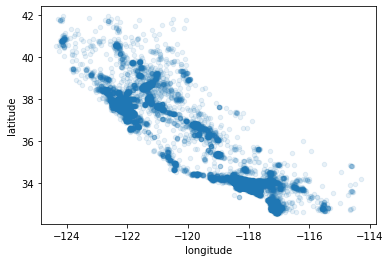

In [32]:
housing_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()

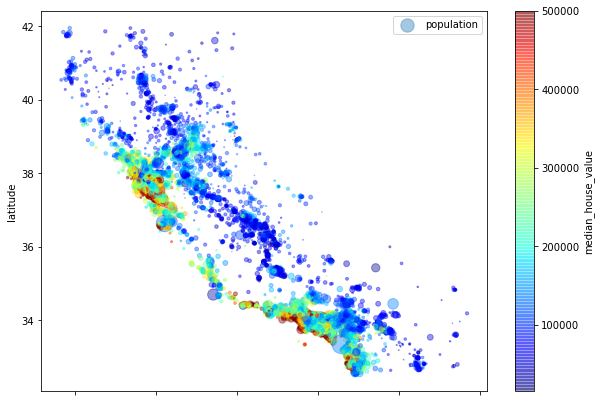

In [38]:
housing_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                 s=housing_data['population']/100, c='median_house_value',
                 cmap=plt.get_cmap('jet'), figsize=(10,7), colorbar=True, label='population')
plt.legend()
plt.show()

In [39]:
corr_matrix = housing_data.corr()

In [40]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924273,-0.104922,0.038285,0.062806,0.091803,0.049462,-0.017220,-0.047697
latitude,-0.924273,1.000000,0.008312,-0.030909,-0.060801,-0.101141,-0.065059,-0.079736,-0.144086
housing_median_age,-0.104922,0.008312,1.000000,-0.363997,-0.325784,-0.296995,-0.307576,-0.122186,0.099620
total_rooms,0.038285,-0.030909,-0.363997,1.000000,0.932215,0.861288,0.922506,0.193073,0.131453
total_bedrooms,0.062806,-0.060801,-0.325784,0.932215,1.000000,0.878930,0.981888,-0.007432,0.048565
population,0.091803,-0.101141,-0.296995,0.861288,0.878930,1.000000,0.906380,0.006171,-0.023790
households,0.049462,-0.065059,-0.307576,0.922506,0.981888,0.906380,1.000000,0.012342,0.064110
median_income,-0.017220,-0.079736,-0.122186,0.193073,-0.007432,0.006171,0.012342,1.000000,0.690077
median_house_value,-0.047697,-0.144086,0.099620,0.131453,0.048565,-0.023790,0.064110,0.690077,1.000000


In [41]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690077
total_rooms           0.131453
housing_median_age    0.099620
households            0.064110
total_bedrooms        0.048565
population           -0.023790
longitude            -0.047697
latitude             -0.144086
Name: median_house_value, dtype: float64

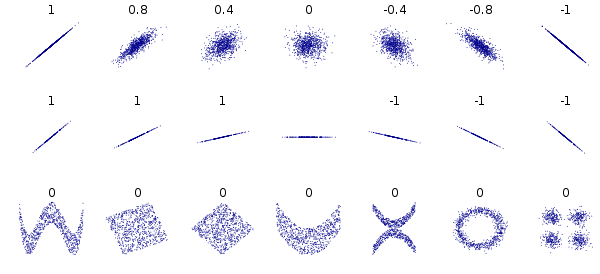

In [42]:
from pandas.plotting import scatter_matrix

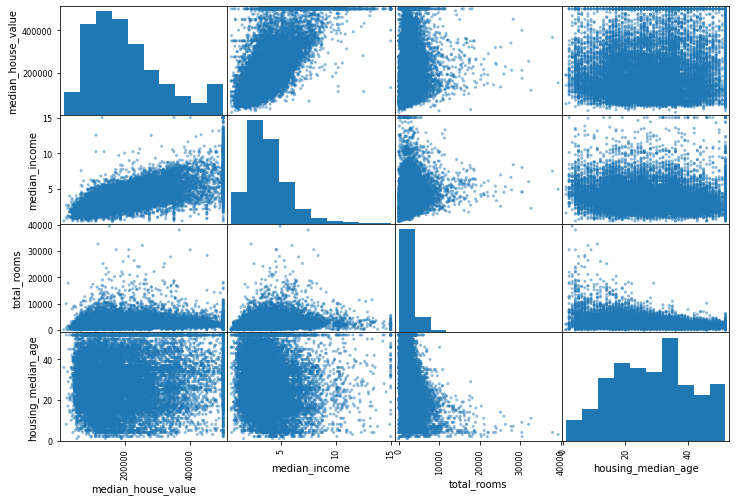

In [43]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing_data[attributes], figsize=(12, 8))
plt.show()

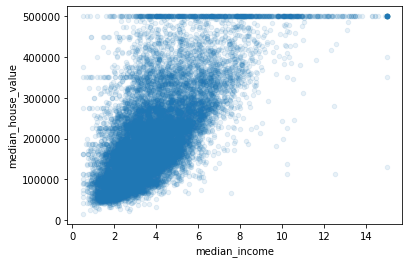

In [45]:
housing_data.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.show()

In [46]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11587,-118.02,33.78,28.0,3375.0,559.0,1754.0,554.0,5.5446,228900.0,<1H OCEAN
12635,-121.47,38.48,25.0,2969.0,551.0,1745.0,487.0,2.6382,76200.0,INLAND
8021,-118.11,33.84,36.0,1756.0,297.0,798.0,287.0,5.5581,218300.0,<1H OCEAN
19326,-122.94,38.50,46.0,2280.0,492.0,807.0,366.0,2.6316,117000.0,<1H OCEAN
9052,-118.12,34.71,46.0,40.0,10.0,14.0,7.0,1.1250,225000.0,INLAND


In [47]:
housing_data['rooms_per_household'] = housing_data['total_rooms'] / housing_data['households']
housing_data['bedrooms_per_household'] = housing_data['total_bedrooms'] / housing_data['households']
housing_data['bedrooms_per_room'] = housing_data['total_bedrooms'] / housing_data['total_rooms']
housing_data['population+per_household'] = housing_data['population'] / housing_data['households']

In [48]:
corr_matrix = housing_data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690077
rooms_per_household         0.153156
total_rooms                 0.131453
housing_median_age          0.099620
households                  0.064110
total_bedrooms              0.048565
population+per_household   -0.022425
population                 -0.023790
bedrooms_per_household     -0.043101
longitude                  -0.047697
latitude                   -0.144086
bedrooms_per_room          -0.261785
Name: median_house_value, dtype: float64

## Data Preparation

In [49]:
housing_dataset = strat_train_set.drop('median_house_value', axis=1)
housing_dataset_labels = strat_train_set['median_house_value'].copy()

In [50]:
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
11587,-118.02,33.78,28.0,3375.0,559.0,1754.0,554.0,5.5446,<1H OCEAN
12635,-121.47,38.48,25.0,2969.0,551.0,1745.0,487.0,2.6382,INLAND
8021,-118.11,33.84,36.0,1756.0,297.0,798.0,287.0,5.5581,<1H OCEAN
19326,-122.94,38.50,46.0,2280.0,492.0,807.0,366.0,2.6316,<1H OCEAN
9052,-118.12,34.71,46.0,40.0,10.0,14.0,7.0,1.1250,INLAND


In [51]:
housing_dataset_labels.head()

11587    228900.0
12635     76200.0
8021     218300.0
19326    117000.0
9052     225000.0
Name: median_house_value, dtype: float64

In [53]:
housing_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16353.000000,16512.000000,16512.000000,16512.000000
mean,-119.565391,35.630110,28.643593,2639.653161,538.187733,1427.906916,500.346415,3.869083
std,2.002437,2.137107,12.555447,2211.363246,424.975313,1151.286177,386.605245,1.900564
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.790000,33.930000,18.000000,1449.000000,296.000000,788.000000,280.000000,2.562500
50%,-118.490000,34.250000,29.000000,2121.000000,435.000000,1168.000000,410.000000,3.531300
75%,-118.010000,37.710000,37.000000,3149.250000,647.000000,1720.000000,605.250000,4.739025
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [55]:
housing_dataset.dropna(subset=['total_bedrooms']).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16353.000000,16353.000000,16353.000000,16353.000000,16353.000000,16353.000000,16353.000000,16353.000000
mean,-119.566927,35.631863,28.636764,2640.605455,538.187733,1427.265823,500.226686,3.869883
std,2.002726,2.137871,12.565456,2214.955670,424.975313,1151.650725,386.400106,1.899137
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.790000,33.930000,18.000000,1451.000000,296.000000,788.000000,280.000000,2.562500
50%,-118.490000,34.250000,29.000000,2121.000000,435.000000,1168.000000,410.000000,3.534100
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1718.000000,605.000000,4.740400
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [59]:
median = housing_dataset['total_bedrooms'].median()
housing_dataset['total_bedrooms'].fillna(median, inplace=True)
print(median)

435.0


In [60]:
housing_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.565391,35.630110,28.643593,2639.653161,537.194101,1427.906916,500.346415,3.869083
std,2.002437,2.137107,12.555447,2211.363246,423.044158,1151.286177,386.605245,1.900564
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.790000,33.930000,18.000000,1449.000000,297.000000,788.000000,280.000000,2.562500
50%,-118.490000,34.250000,29.000000,2121.000000,435.000000,1168.000000,410.000000,3.531300
75%,-118.010000,37.710000,37.000000,3149.250000,644.000000,1720.000000,605.250000,4.739025
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [61]:
housing_dataset = strat_train_set.drop('median_house_value', axis=1)
housing_dataset_labels = strat_train_set['median_house_value'].copy()
housing_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16353.000000,16512.000000,16512.000000,16512.000000
mean,-119.565391,35.630110,28.643593,2639.653161,538.187733,1427.906916,500.346415,3.869083
std,2.002437,2.137107,12.555447,2211.363246,424.975313,1151.286177,386.605245,1.900564
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.790000,33.930000,18.000000,1449.000000,296.000000,788.000000,280.000000,2.562500
50%,-118.490000,34.250000,29.000000,2121.000000,435.000000,1168.000000,410.000000,3.531300
75%,-118.010000,37.710000,37.000000,3149.250000,647.000000,1720.000000,605.250000,4.739025
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [62]:
from sklearn.impute import SimpleImputer

In [63]:
imputer = SimpleImputer(strategy='median')

In [64]:
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
11587,-118.02,33.78,28.0,3375.0,559.0,1754.0,554.0,5.5446,<1H OCEAN
12635,-121.47,38.48,25.0,2969.0,551.0,1745.0,487.0,2.6382,INLAND
8021,-118.11,33.84,36.0,1756.0,297.0,798.0,287.0,5.5581,<1H OCEAN
19326,-122.94,38.50,46.0,2280.0,492.0,807.0,366.0,2.6316,<1H OCEAN
9052,-118.12,34.71,46.0,40.0,10.0,14.0,7.0,1.1250,INLAND


In [67]:
housing_dataset_num = housing_dataset.drop('ocean_proximity', axis=1)
housing_dataset_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
11587,-118.02,33.78,28.0,3375.0,559.0,1754.0,554.0,5.5446
12635,-121.47,38.48,25.0,2969.0,551.0,1745.0,487.0,2.6382
8021,-118.11,33.84,36.0,1756.0,297.0,798.0,287.0,5.5581
19326,-122.94,38.50,46.0,2280.0,492.0,807.0,366.0,2.6316
9052,-118.12,34.71,46.0,40.0,10.0,14.0,7.0,1.1250


In [68]:
imputer.fit(housing_dataset_num)

SimpleImputer(strategy='median')

In [69]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2121.    ,  435.    , 1168.    ,
        410.    ,    3.5313])

In [70]:
X = imputer.transform(housing_dataset_num)
X.shape

(16512, 8)

In [71]:
housing_tr = pd.DataFrame(X, columns=housing_dataset_num.columns, index=housing_dataset_num.index)

In [72]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.565391,35.630110,28.643593,2639.653161,537.194101,1427.906916,500.346415,3.869083
std,2.002437,2.137107,12.555447,2211.363246,423.044158,1151.286177,386.605245,1.900564
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.790000,33.930000,18.000000,1449.000000,297.000000,788.000000,280.000000,2.562500
50%,-118.490000,34.250000,29.000000,2121.000000,435.000000,1168.000000,410.000000,3.531300
75%,-118.010000,37.710000,37.000000,3149.250000,644.000000,1720.000000,605.250000,4.739025
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [73]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
11587,-118.02,33.78,28.0,3375.0,559.0,1754.0,554.0,5.5446
12635,-121.47,38.48,25.0,2969.0,551.0,1745.0,487.0,2.6382
8021,-118.11,33.84,36.0,1756.0,297.0,798.0,287.0,5.5581
19326,-122.94,38.50,46.0,2280.0,492.0,807.0,366.0,2.6316
9052,-118.12,34.71,46.0,40.0,10.0,14.0,7.0,1.1250


In [74]:
housing_cat = housing_dataset[['ocean_proximity']]

In [75]:
housing_cat.head(10)

,ocean_proximity
11587,<1H OCEAN
12635,INLAND
8021,<1H OCEAN
19326,<1H OCEAN
9052,INLAND
7835,<1H OCEAN
5476,<1H OCEAN
9712,<1H OCEAN
4348,<1H OCEAN
9615,INLAND


In [77]:
from sklearn.preprocessing import OrdinalEncoder

In [78]:
ordinal_encoder = OrdinalEncoder()

In [79]:
housing_cat_encod = ordinal_encoder.fit_transform(housing_cat)

In [80]:
housing_cat_encod[:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [81]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [82]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
cat_encoder = OneHotEncoder()

In [84]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [85]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [86]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Scaling

In [87]:
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
11587,-118.02,33.78,28.0,3375.0,559.0,1754.0,554.0,5.5446,<1H OCEAN
12635,-121.47,38.48,25.0,2969.0,551.0,1745.0,487.0,2.6382,INLAND
8021,-118.11,33.84,36.0,1756.0,297.0,798.0,287.0,5.5581,<1H OCEAN
19326,-122.94,38.50,46.0,2280.0,492.0,807.0,366.0,2.6316,<1H OCEAN
9052,-118.12,34.71,46.0,40.0,10.0,14.0,7.0,1.1250,INLAND


In [88]:
housing_dataset_labels.head()

11587    228900.0
12635     76200.0
8021     218300.0
19326    117000.0
9052     225000.0
Name: median_house_value, dtype: float64

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
from sklearn.pipeline import Pipeline

In [91]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
])

In [92]:
housing_dataset_num_tr = num_pipeline.fit_transform(housing_dataset_num)

In [95]:
pd.DataFrame(housing_dataset_num_tr, columns=housing_dataset_num.columns, index=housing_dataset_num.index).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,0.476555,0.328386,0.542031,0.067085,0.083066,0.039937,0.081965,0.232354
std,0.199446,0.227110,0.246185,0.056243,0.065659,0.032268,0.063586,0.131072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254980,0.147715,0.333333,0.036802,0.045786,0.022002,0.045724,0.142246
50%,0.583665,0.181722,0.549020,0.053894,0.067205,0.032652,0.067105,0.209059
75%,0.631474,0.549416,0.705882,0.080046,0.099643,0.048124,0.099219,0.292349
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
minmax_scaler = MinMaxScaler()
x = np.asarray([1,2,3,4,5,6,7,10,1500]).reshape(-1, 1)
minmax_scaler.fit_transform(x)

array([[0.00000000e+00],
       [6.67111408e-04],
       [1.33422282e-03],
       [2.00133422e-03],
       [2.66844563e-03],
       [3.33555704e-03],
       [4.00266845e-03],
       [6.00400267e-03],
       [1.00000000e+00]])

In [99]:
from sklearn.preprocessing import StandardScaler

In [103]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

In [104]:
housing_dataset_num_tr = num_pipeline.fit_transform(housing_dataset_num)

In [105]:
pd.DataFrame(housing_dataset_num_tr, columns=housing_dataset_num.columns, index=housing_dataset_num.index).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-2.249802e-15,2.719293e-15,-2.229590e-16,-1.009838e-16,7.945437e-17,-4.352946e-17,-9.179915e-17,-2.088661e-16
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.389465e+00,-1.445975e+00,-2.201788e+00,-1.192809e+00,-1.265141e+00,-1.237703e+00,-1.289071e+00,-1.772782e+00
25%,-1.110984e+00,-7.955436e-01,-8.477528e-01,-5.384413e-01,-5.677927e-01,-5.558360e-01,-5.699692e-01,-6.874919e-01
50%,5.370574e-01,-6.458039e-01,2.838754e-02,-2.345471e-01,-2.415757e-01,-2.257604e-01,-2.336987e-01,-1.777330e-01
75%,7.767726e-01,9.732563e-01,6.655805e-01,2.304516e-01,2.524775e-01,2.537179e-01,2.713537e-01,4.577425e-01
max,2.624577e+00,2.957307e+00,1.860317e+00,1.658771e+01,1.396541e+01,2.975379e+01,1.443804e+01,5.856870e+00


In [106]:
from sklearn.compose import ColumnTransformer

In [107]:
num_attribute = list(housing_dataset_num)
cat_attribute = ['ocean_proximity']

In [108]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribute),
    ('cat', OneHotEncoder(), cat_attribute)
])

In [109]:
housing_dataset_prepared = full_pipeline.fit_transform(housing_dataset)

In [112]:
housing_dataset_prepared

array([[ 0.77177853, -0.86573405, -0.05126158, ...,  0.        ,
         0.        ,  0.        ],
       [-0.95117413,  1.33356736, -0.29020894, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.72683194, -0.83765786,  0.58593138, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.01110292,  1.93720541, -0.36985806, ...,  0.        ,
         0.        ,  0.        ],
       [-1.08101984,  0.40705315, -0.1309107 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.23622665, -1.27751814, -1.00705102, ...,  0.        ,
         0.        ,  0.        ]])

In [113]:
from sklearn.linear_model import LinearRegression

In [115]:
lin_reg = LinearRegression()
lin_reg.fit(housing_dataset_prepared, housing_dataset_labels)

LinearRegression()

In [116]:
some_data = housing_dataset.iloc[:5]
some_labels = housing_dataset_labels.iloc[:5]

In [117]:
some_data_pr = full_pipeline.transform(some_data)

In [120]:
some_data_predictions = lin_reg.predict(some_data_pr)
print('Predictions are', some_data_predictions)

Predictions are [278268.61334167  92953.86883216 293259.072842   217942.19001431
  67350.02495822]


In [121]:
print('Labels are', some_labels)

Labels are 11587    228900.0
12635     76200.0
8021     218300.0
19326    117000.0
9052     225000.0
Name: median_house_value, dtype: float64


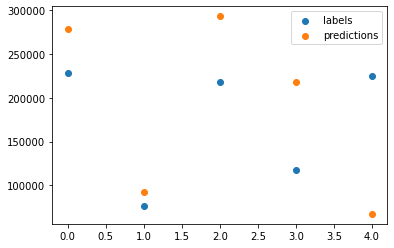

In [122]:
plt.scatter(range(5), some_labels, label='labels')
plt.scatter(range(5), some_data_predictions, label='predictions')
plt.legend()
plt.show()

In [123]:
from sklearn.metrics import mean_squared_error

In [124]:
housing_dataset_pred = lin_reg.predict(housing_dataset_prepared)

In [125]:
lin_reg_mse = mean_squared_error(housing_dataset_labels, housing_dataset_pred)

In [126]:
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_rmse

68451.08429924796

In [127]:
from sklearn.tree import DecisionTreeRegressor

In [128]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_dataset_prepared, housing_dataset_labels)

DecisionTreeRegressor()

In [129]:
def evaluate_model(model, data, true_labels):
    dataset_pred = model.predict(data)
    model_mse = mean_squared_error(true_labels, dataset_pred)
    model_rmse = np.sqrt(model_mse)
    return model_rmse

In [131]:
evaluate_model(lin_reg, housing_dataset_prepared, housing_dataset_labels)

68451.08429924796

In [132]:
evaluate_model(tree_reg, housing_dataset_prepared, housing_dataset_labels)

0.0

In [133]:
from sklearn.model_selection import cross_val_score

In [134]:
scores = cross_val_score(tree_reg, housing_dataset_prepared, housing_dataset_labels, 
                        cv=10, scoring='neg_mean_squared_error')

In [135]:
tree_reg_rmse_scores = np.sqrt(-scores)

In [136]:
tree_reg_rmse_scores

array([69199.53541384, 71214.86823204, 66706.31422253, 67333.58422743,
       71389.49267225, 70503.9005879 , 68060.05104728, 66796.51244483,
       70024.28590762, 67387.46262296])

In [138]:
def display_scores(scores):
    print(f'Mean: {scores.mean():.4f}')
    print(f'Standard deviation: {scores.std():.4f}')
    print(scores)

In [139]:
display_scores(tree_reg_rmse_scores)

Mean: 68861.6007
Standard deviation: 1736.4199
[69199.53541384 71214.86823204 66706.31422253 67333.58422743
 71389.49267225 70503.9005879  68060.05104728 66796.51244483
 70024.28590762 67387.46262296]


In [140]:
scores = cross_val_score(lin_reg, housing_dataset_prepared, housing_dataset_labels, 
                        cv=10, scoring='neg_mean_squared_error')

In [141]:
display_scores(np.sqrt(-scores))

Mean: 68611.4557
Standard deviation: 2014.9250
[69485.43878521 71571.42220294 65492.11579997 66058.30571405
 69165.1277102  70256.18316738 70142.01109305 69019.36243808
 65637.01224397 69287.57792018]


In [142]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_dataset_prepared, housing_dataset_labels)

RandomForestRegressor()

In [144]:
evaluate_model(forest_reg, housing_dataset_prepared, housing_dataset_labels)

18036.805700508095

In [145]:
scores = cross_val_score(forest_reg, housing_dataset_prepared, housing_dataset_labels, 
                        cv=10, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-scores))

Mean: 48637.4513
Standard deviation: 1522.4627
[48280.87805043 51136.11095857 47695.01610426 46694.95606608
 49878.90715006 49886.60389408 49977.02977911 47267.95685936
 49174.93858932 46382.11567354]


In [146]:
import joblib

In [148]:
joblib.dump(forest_reg, 'forest_reg.pkl')

['forest_reg.pkl']

In [149]:
loaded_model = joblib.load('forest_reg.pkl')